In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings('ignore', category=UserWarning, message="Could not find the number of physical cores")
import os
os.environ["LOKY_MAX_CPU_COUNT"] = "4"

In [2]:
transaction_data = pd.read_csv('transaction_data.csv')
purchase_behaviour = pd.read_csv('purchase_behaviour.csv')

In [3]:
transaction_data['DATE'] = pd.to_datetime(transaction_data['DATE'])

In [4]:
merged_data = pd.merge(transaction_data, purchase_behaviour, on='LYLTY_CARD_NBR')

In [5]:
product_sales = transaction_data.groupby('PROD_NAME')['TOT_SALES'].sum().reset_index()
top_3_products = product_sales.sort_values(by='TOT_SALES', ascending=False).head(3)

C:\Users\galig\AppData\Local\Temp\ipykernel_47780\3753553990.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products, palette='viridis')


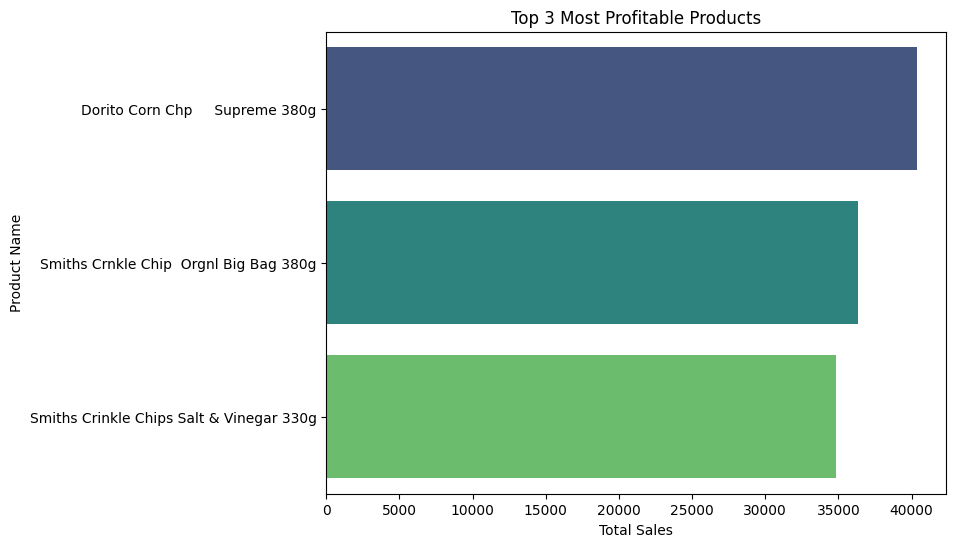

In [6]:
plt.figure(figsize=(8, 6))
sns.barplot(x='TOT_SALES', y='PROD_NAME', data=top_3_products, palette='viridis')
plt.title('Top 3 Most Profitable Products')
plt.xlabel('Total Sales')
plt.ylabel('Product Name')
plt.show()

In [7]:
customer_sales = transaction_data.groupby('LYLTY_CARD_NBR').agg(
    total_spent=('TOT_SALES', 'sum'),
    transaction_count=('TXN_ID', 'nunique')
).reset_index()

In [8]:
customer_sales = pd.merge(customer_sales, purchase_behaviour, on='LYLTY_CARD_NBR')

In [9]:
loyal_customers = customer_sales[customer_sales['total_spent'] > customer_sales['total_spent'].quantile(0.8)]


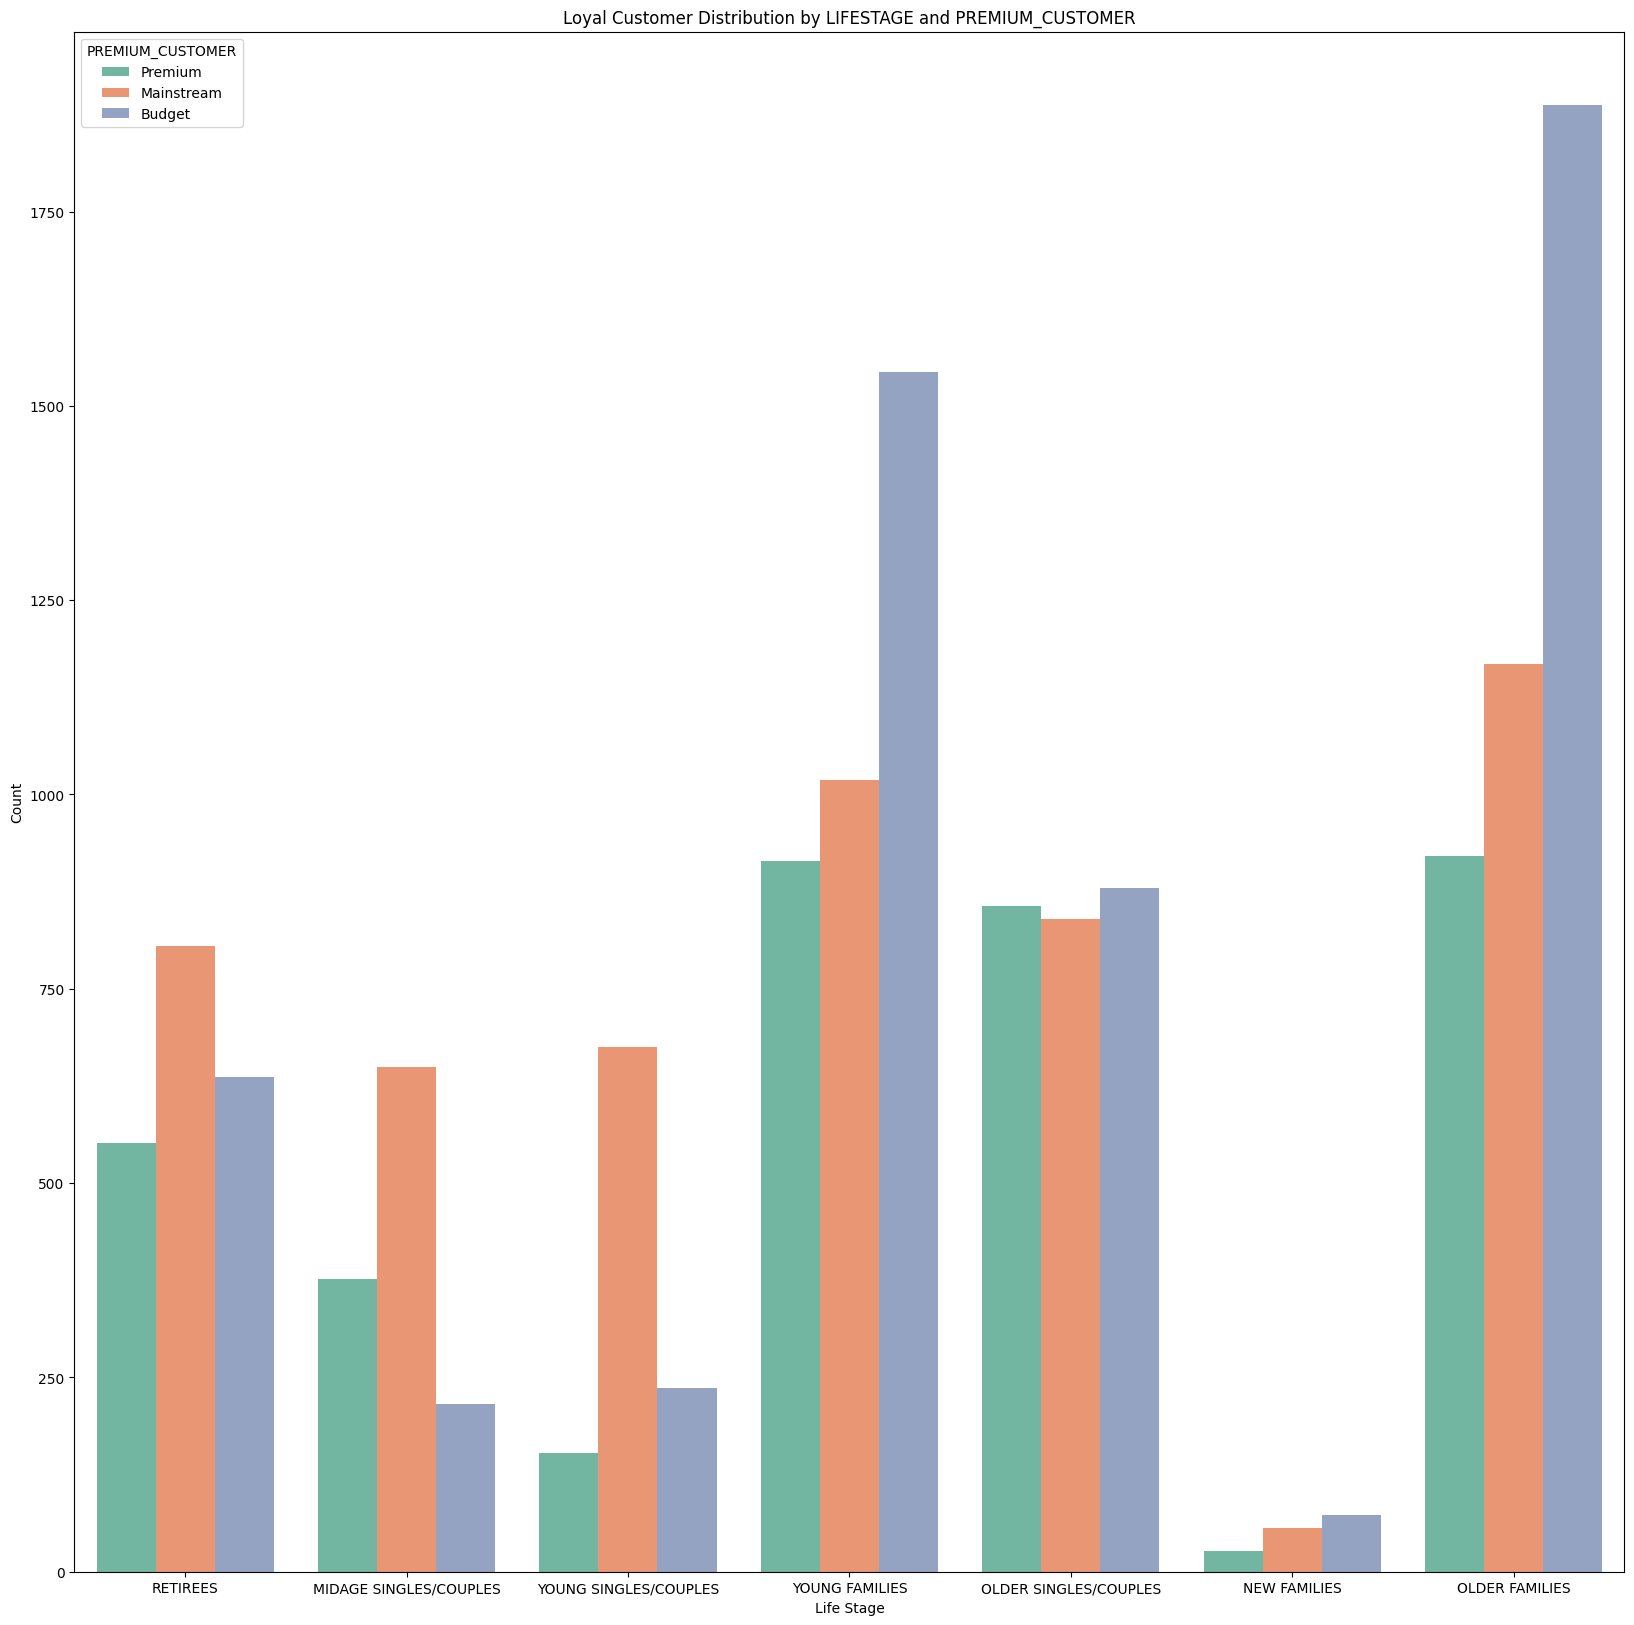

In [33]:
plt.figure(figsize=(20, 20))
sns.countplot(x='LIFESTAGE', hue='PREMIUM_CUSTOMER', data=loyal_customers, palette='Set2')
plt.title('Loyal Customer Distribution by LIFESTAGE and PREMIUM_CUSTOMER')
plt.xlabel('Life Stage')
plt.ylabel('Count')
plt.show()

In [15]:
loyalty_hypothesis = loyal_customers.groupby(['LIFESTAGE', 'PREMIUM_CUSTOMER']).agg(
    avg_spent=('total_spent', 'mean'),
    avg_transactions=('transaction_count', 'mean')
).reset_index()

In [16]:
loyalty_hypothesis

,LIFESTAGE,PREMIUM_CUSTOMER,avg_spent,avg_transactions
0,MIDAGE SINGLES/COUPLES,Budget,55.648380,7.189815
1,MIDAGE SINGLES/COUPLES,Mainstream,57.461000,7.150769
2,MIDAGE SINGLES/COUPLES,Premium,57.350532,7.367021
3,NEW FAMILIES,Budget,50.608219,5.849315
4,NEW FAMILIES,Mainstream,49.020536,5.696429
5,NEW FAMILIES,Premium,48.511111,5.740741
6,OLDER FAMILIES,Budget,62.171092,8.266561
7,OLDER FAMILIES,Mainstream,62.316524,8.307363
8,OLDER FAMILIES,Premium,62.499240,8.182410
9,OLDER SINGLES/COUPLES,Budget,56.652898,7.110227


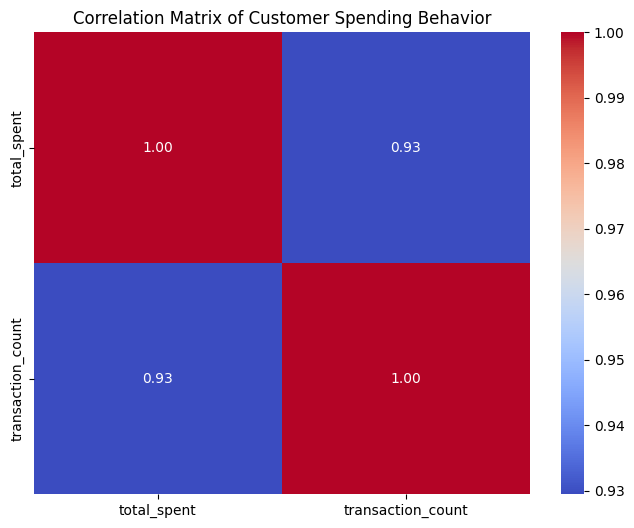

In [27]:
correlation_matrix = customer_sales[['total_spent', 'transaction_count']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Customer Spending Behavior')
plt.show()

In [24]:
customer_sales_subset = customer_sales[['total_spent', 'transaction_count']]
kmeans = KMeans(n_clusters=3, random_state=42)
customer_sales['cluster'] = kmeans.fit_predict(customer_sales_subset)

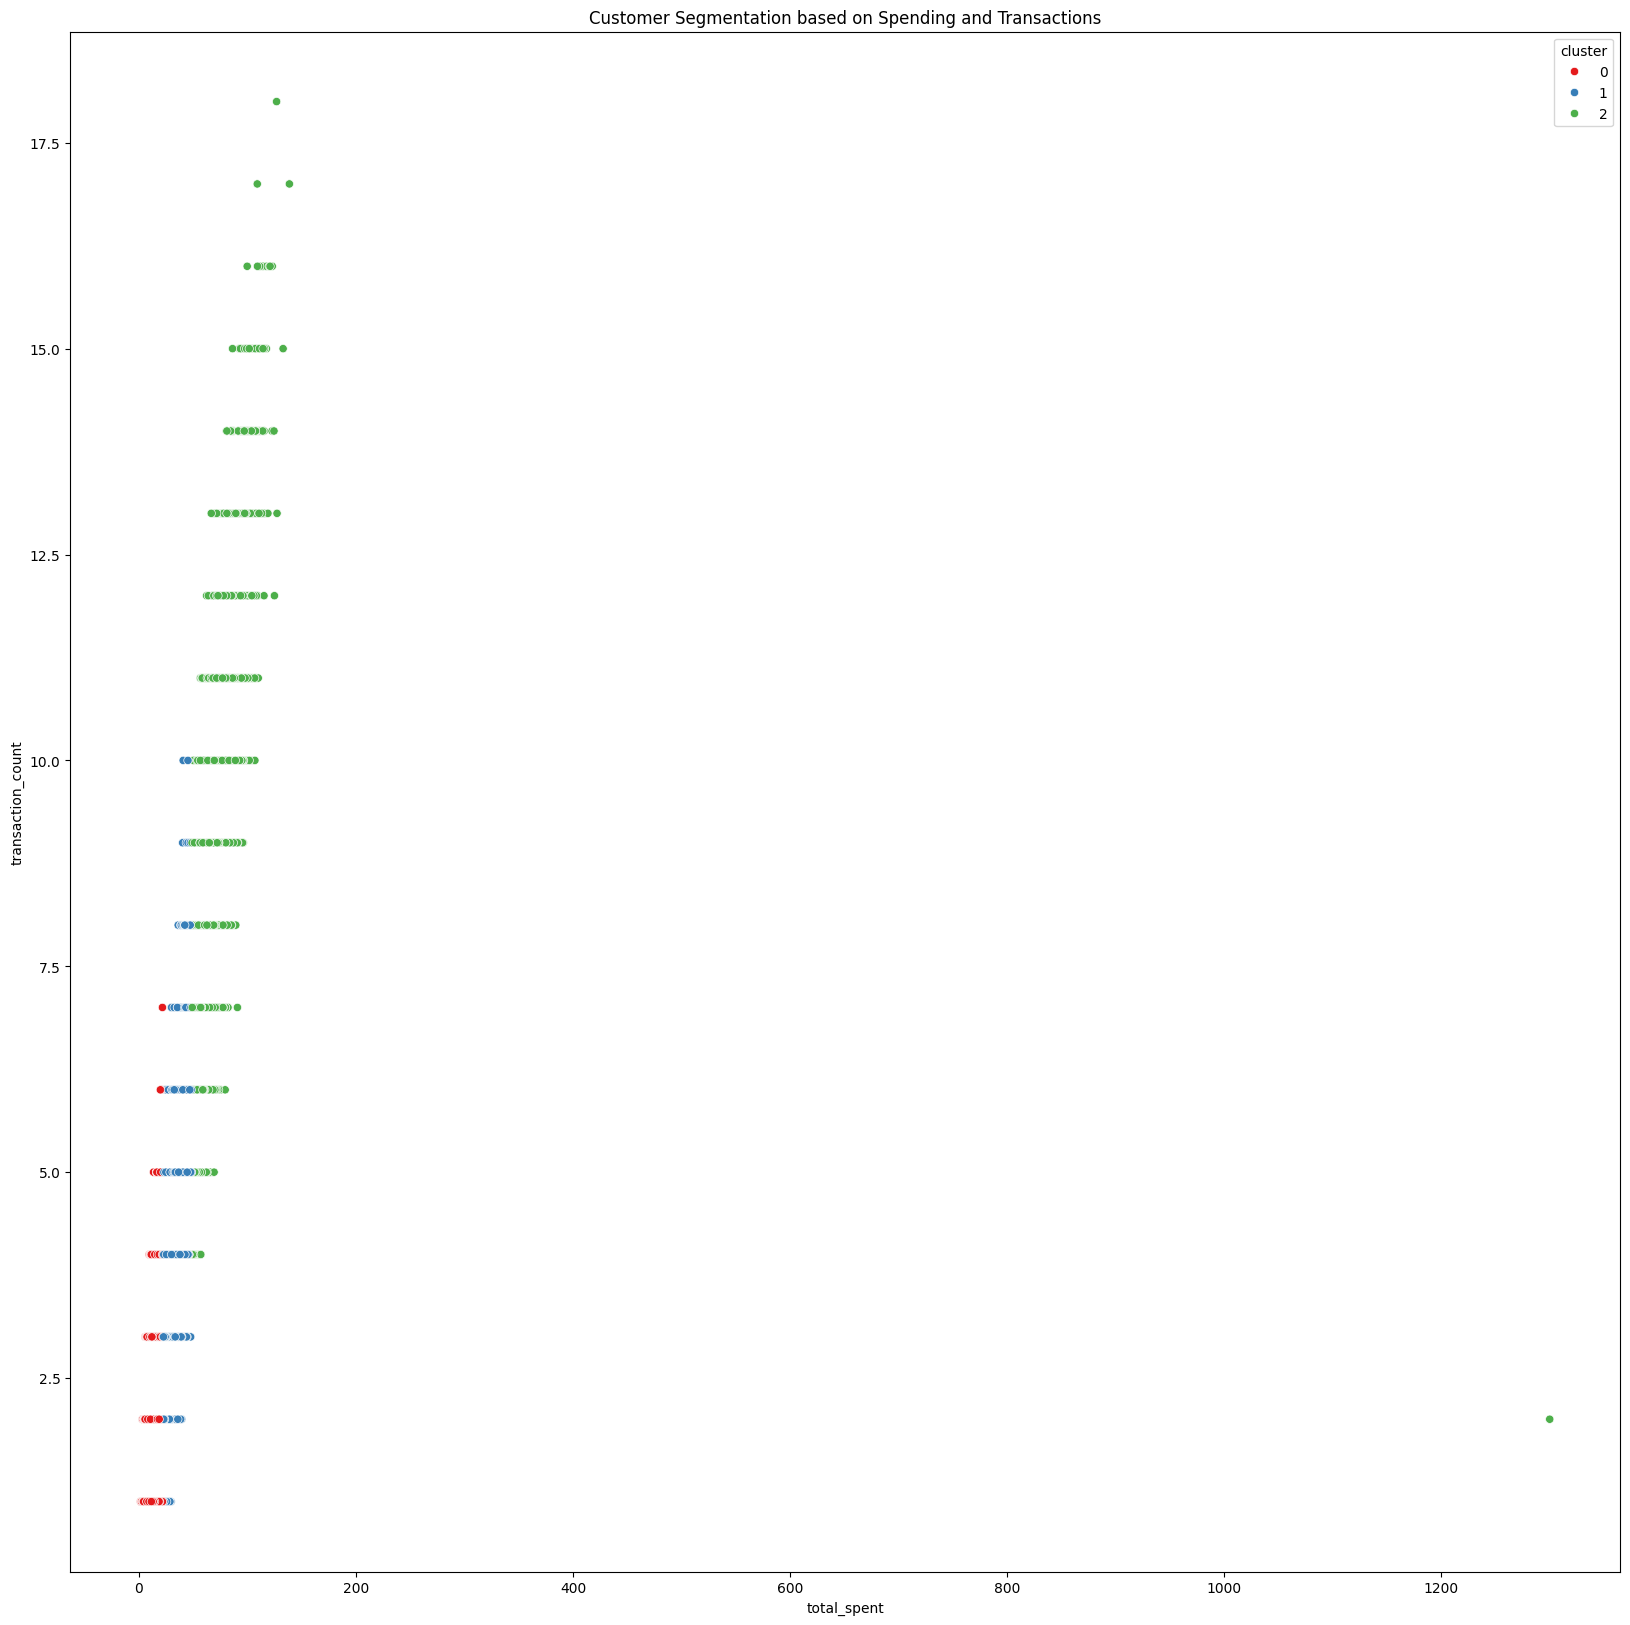

In [50]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x='total_spent', y='transaction_count', hue='cluster', data=customer_sales, palette='Set1')
plt.title('Customer Segmentation based on Spending and Transactions')
plt.show()

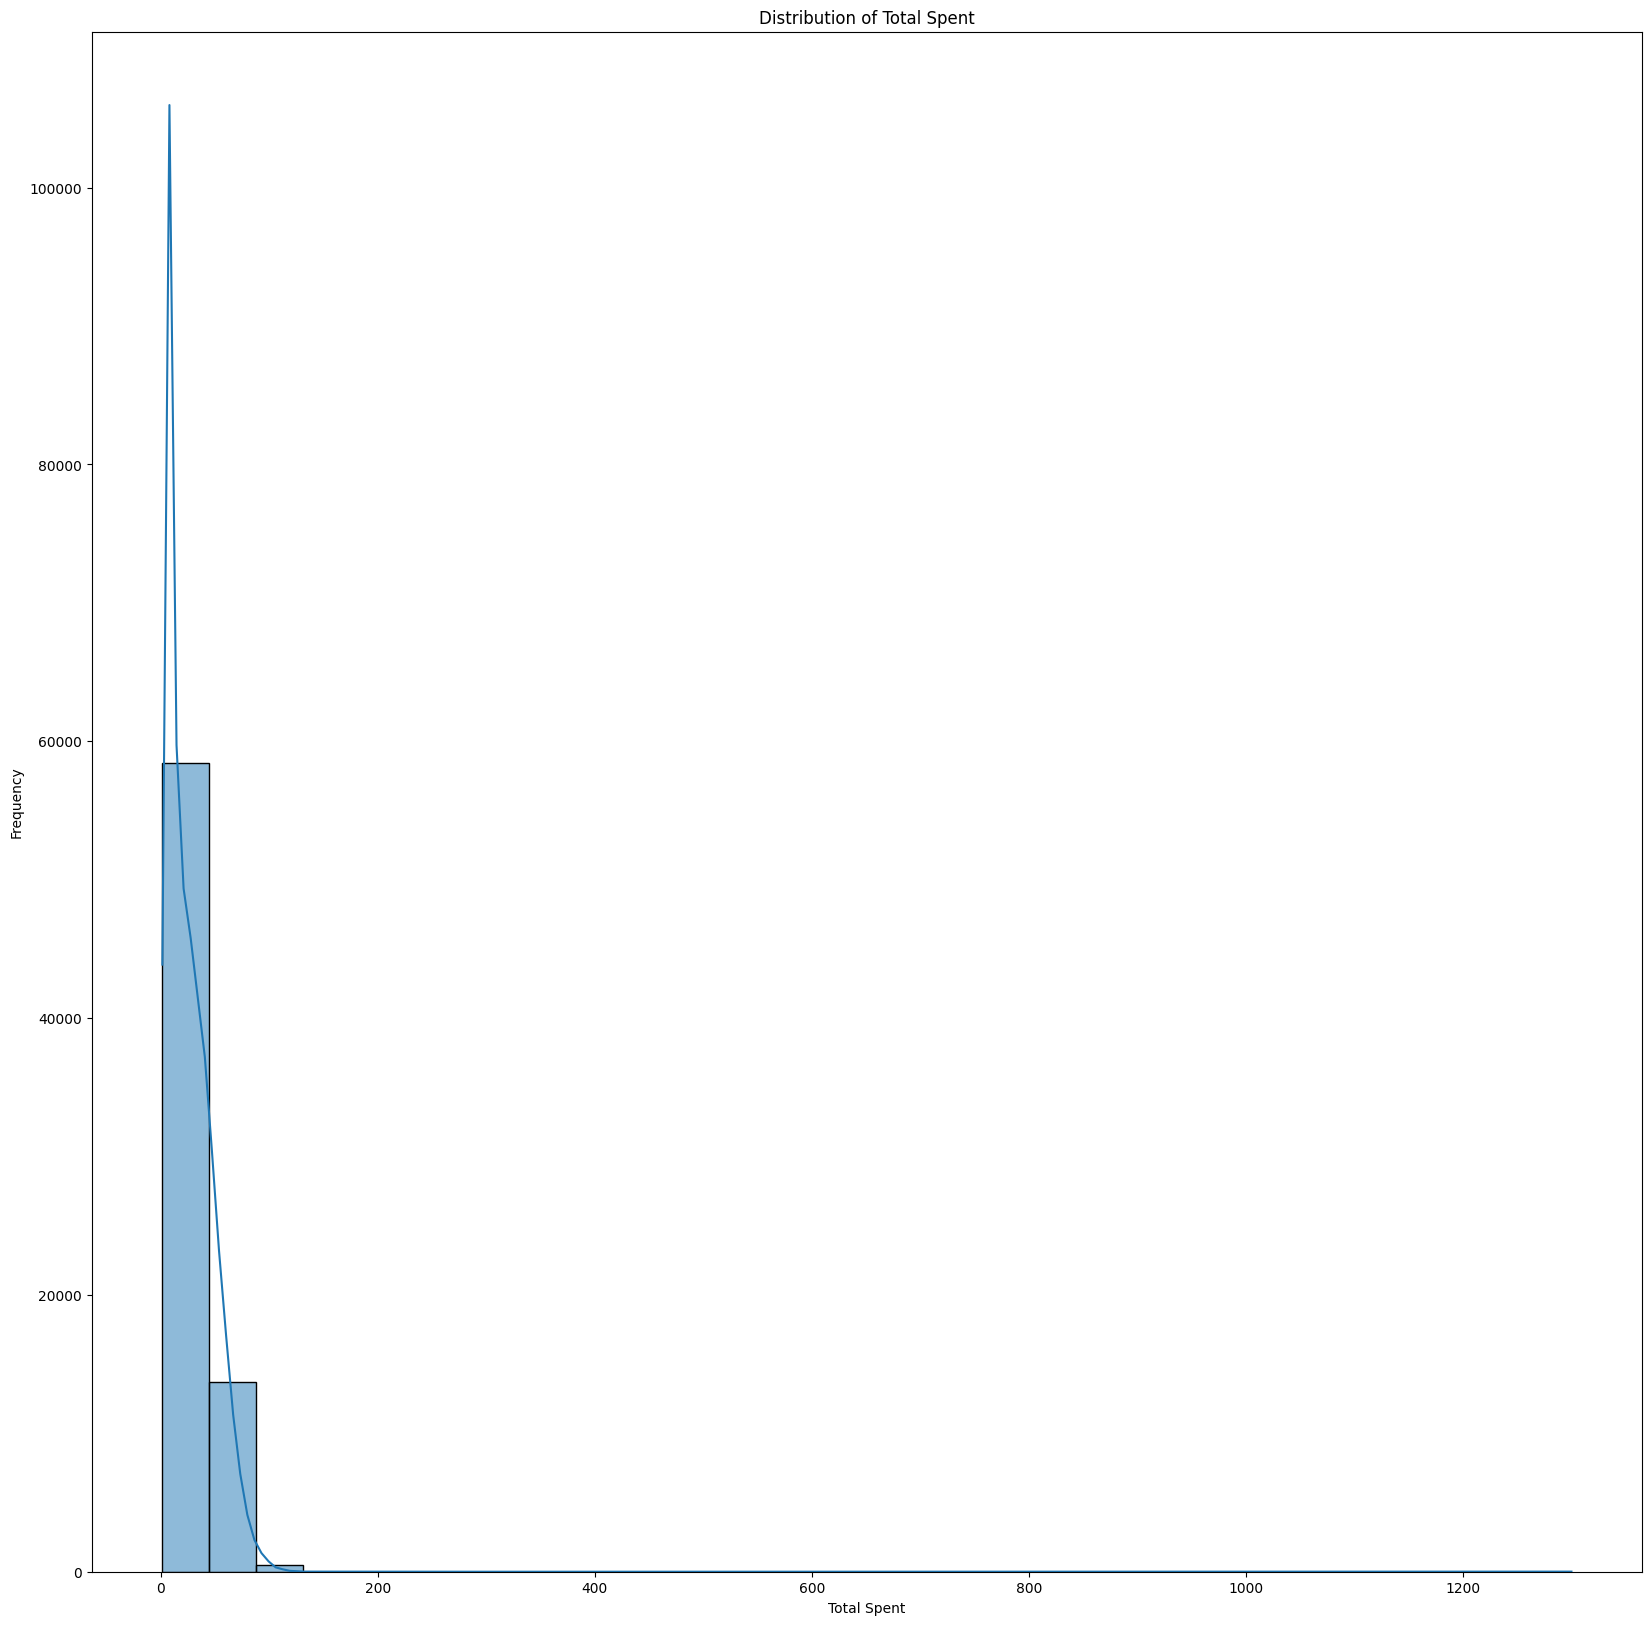

In [51]:
plt.figure(figsize=(20, 20))
sns.histplot(customer_sales['total_spent'], bins=30, kde=True)
plt.title('Distribution of Total Spent')
plt.xlabel('Total Spent')
plt.ylabel('Frequency')
plt.show()

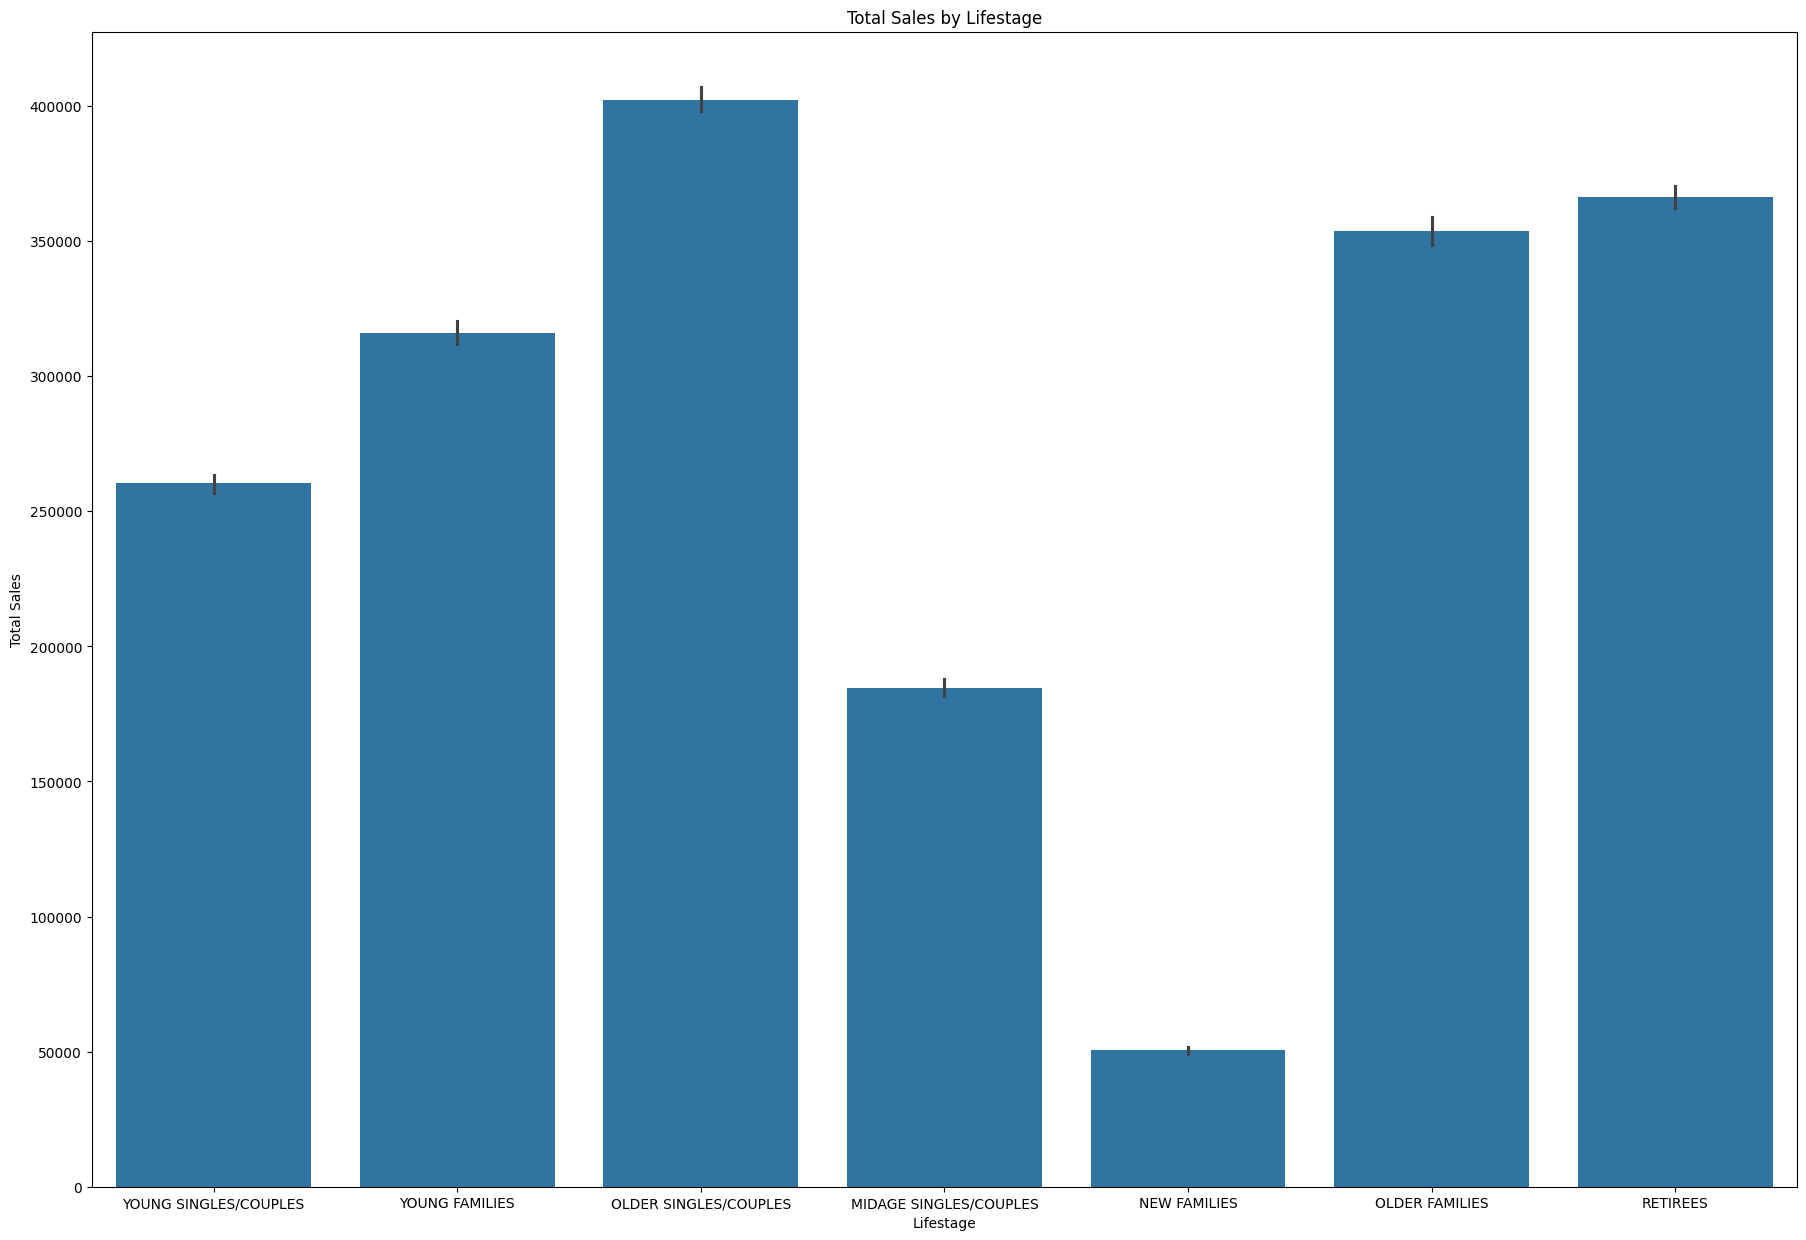

In [44]:
plt.figure(figsize=(22,15))
sns.barplot(x=customer_sales['LIFESTAGE'], y=customer_sales['total_spent'], estimator=sum)
plt.xticks(rotation=0)
plt.title('Total Sales by Lifestage')
plt.xlabel('Lifestage')
plt.ylabel('Total Sales')
plt.show()

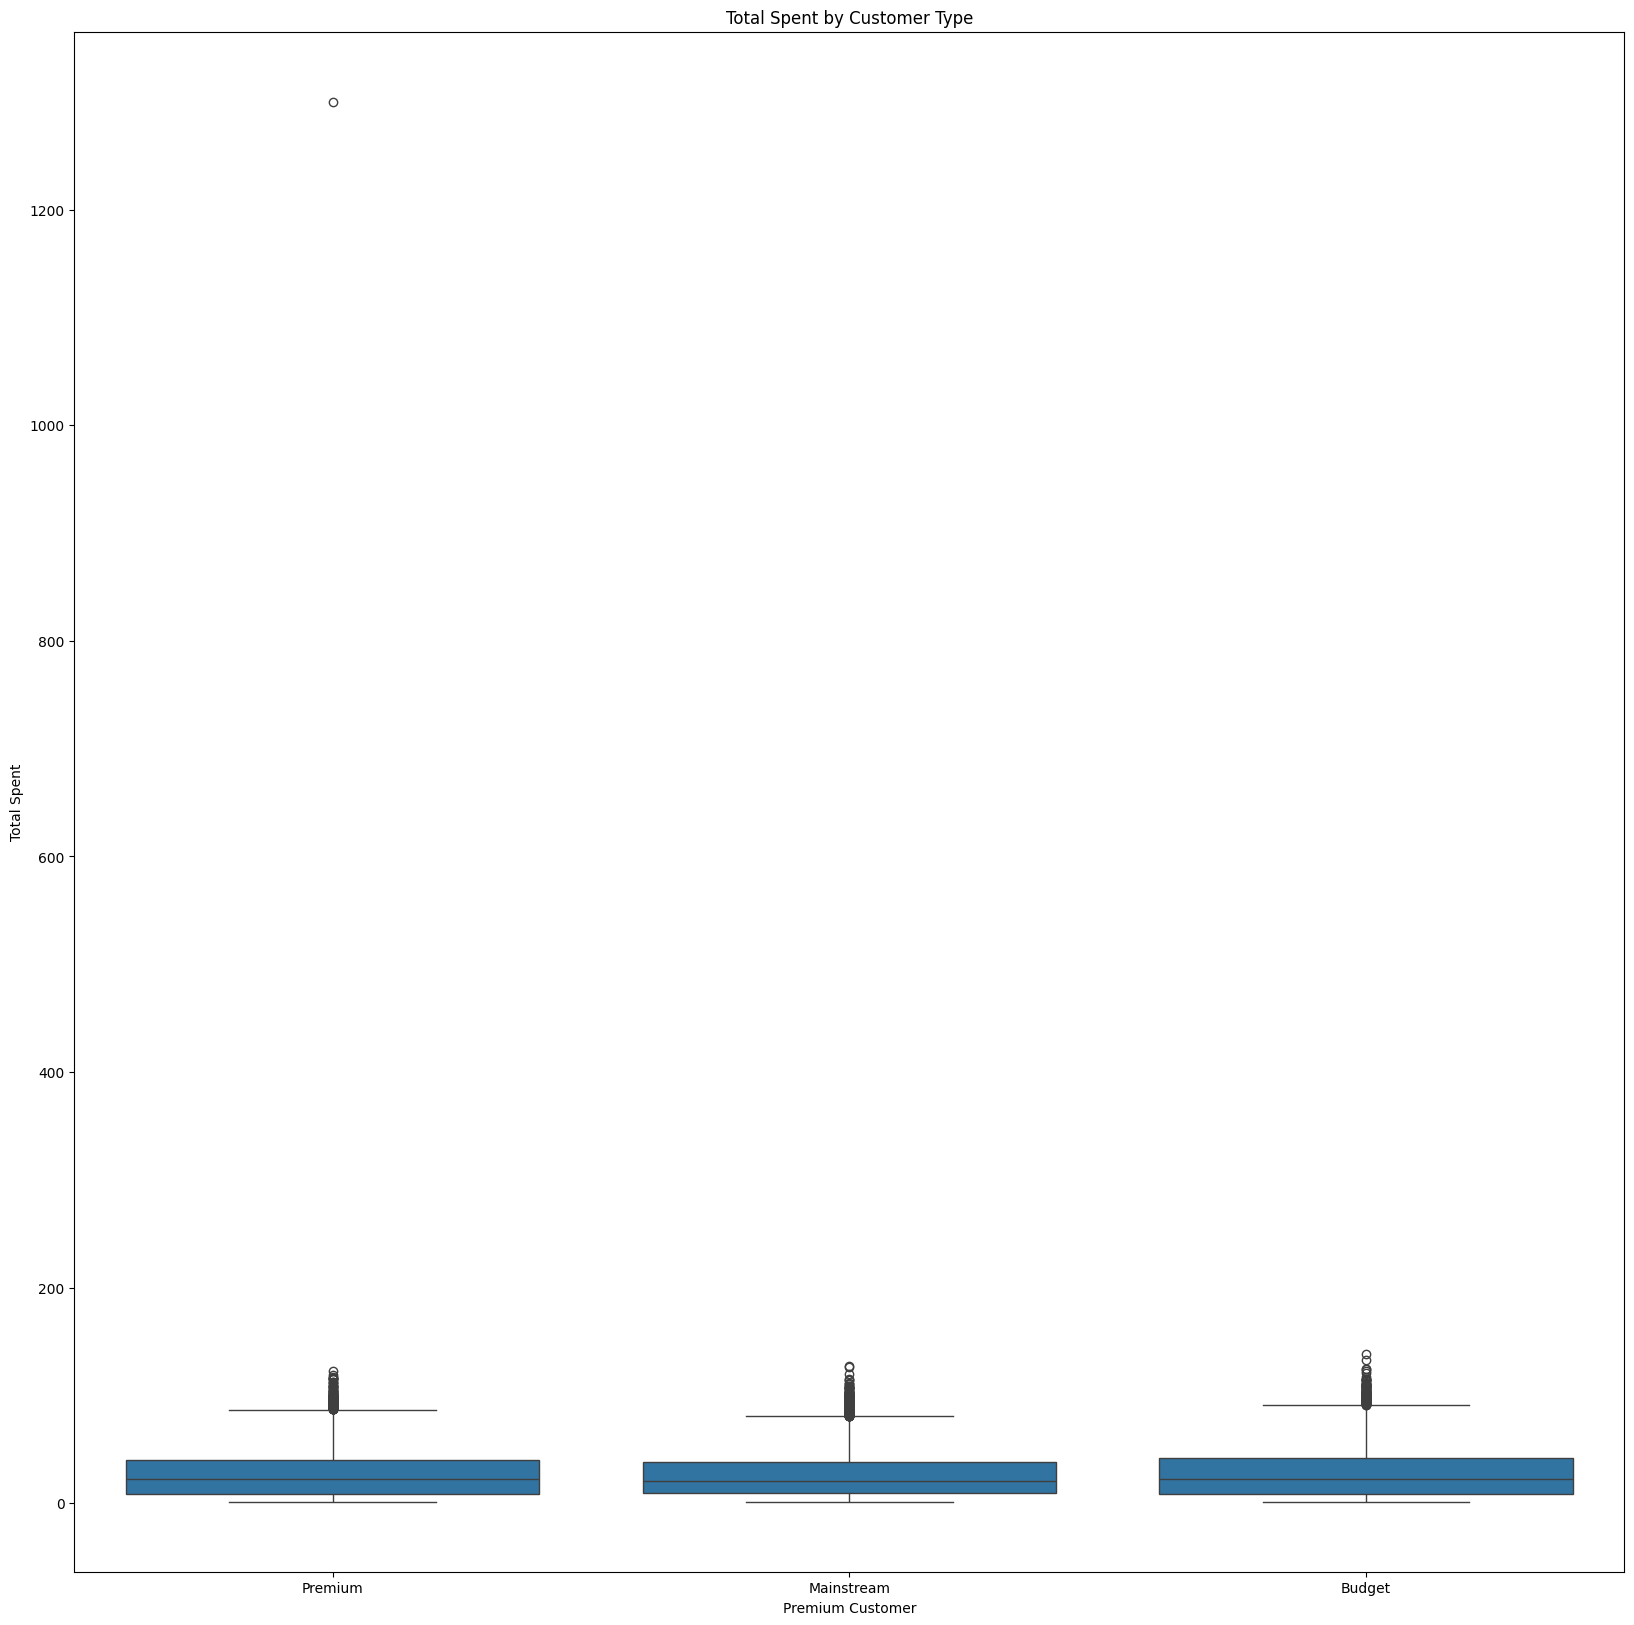

In [46]:
plt.figure(figsize=(20, 20))
sns.boxplot(x=customer_sales['PREMIUM_CUSTOMER'], y=customer_sales['total_spent'])
plt.title('Total Spent by Customer Type')
plt.xlabel('Premium Customer')
plt.ylabel('Total Spent')
plt.show()

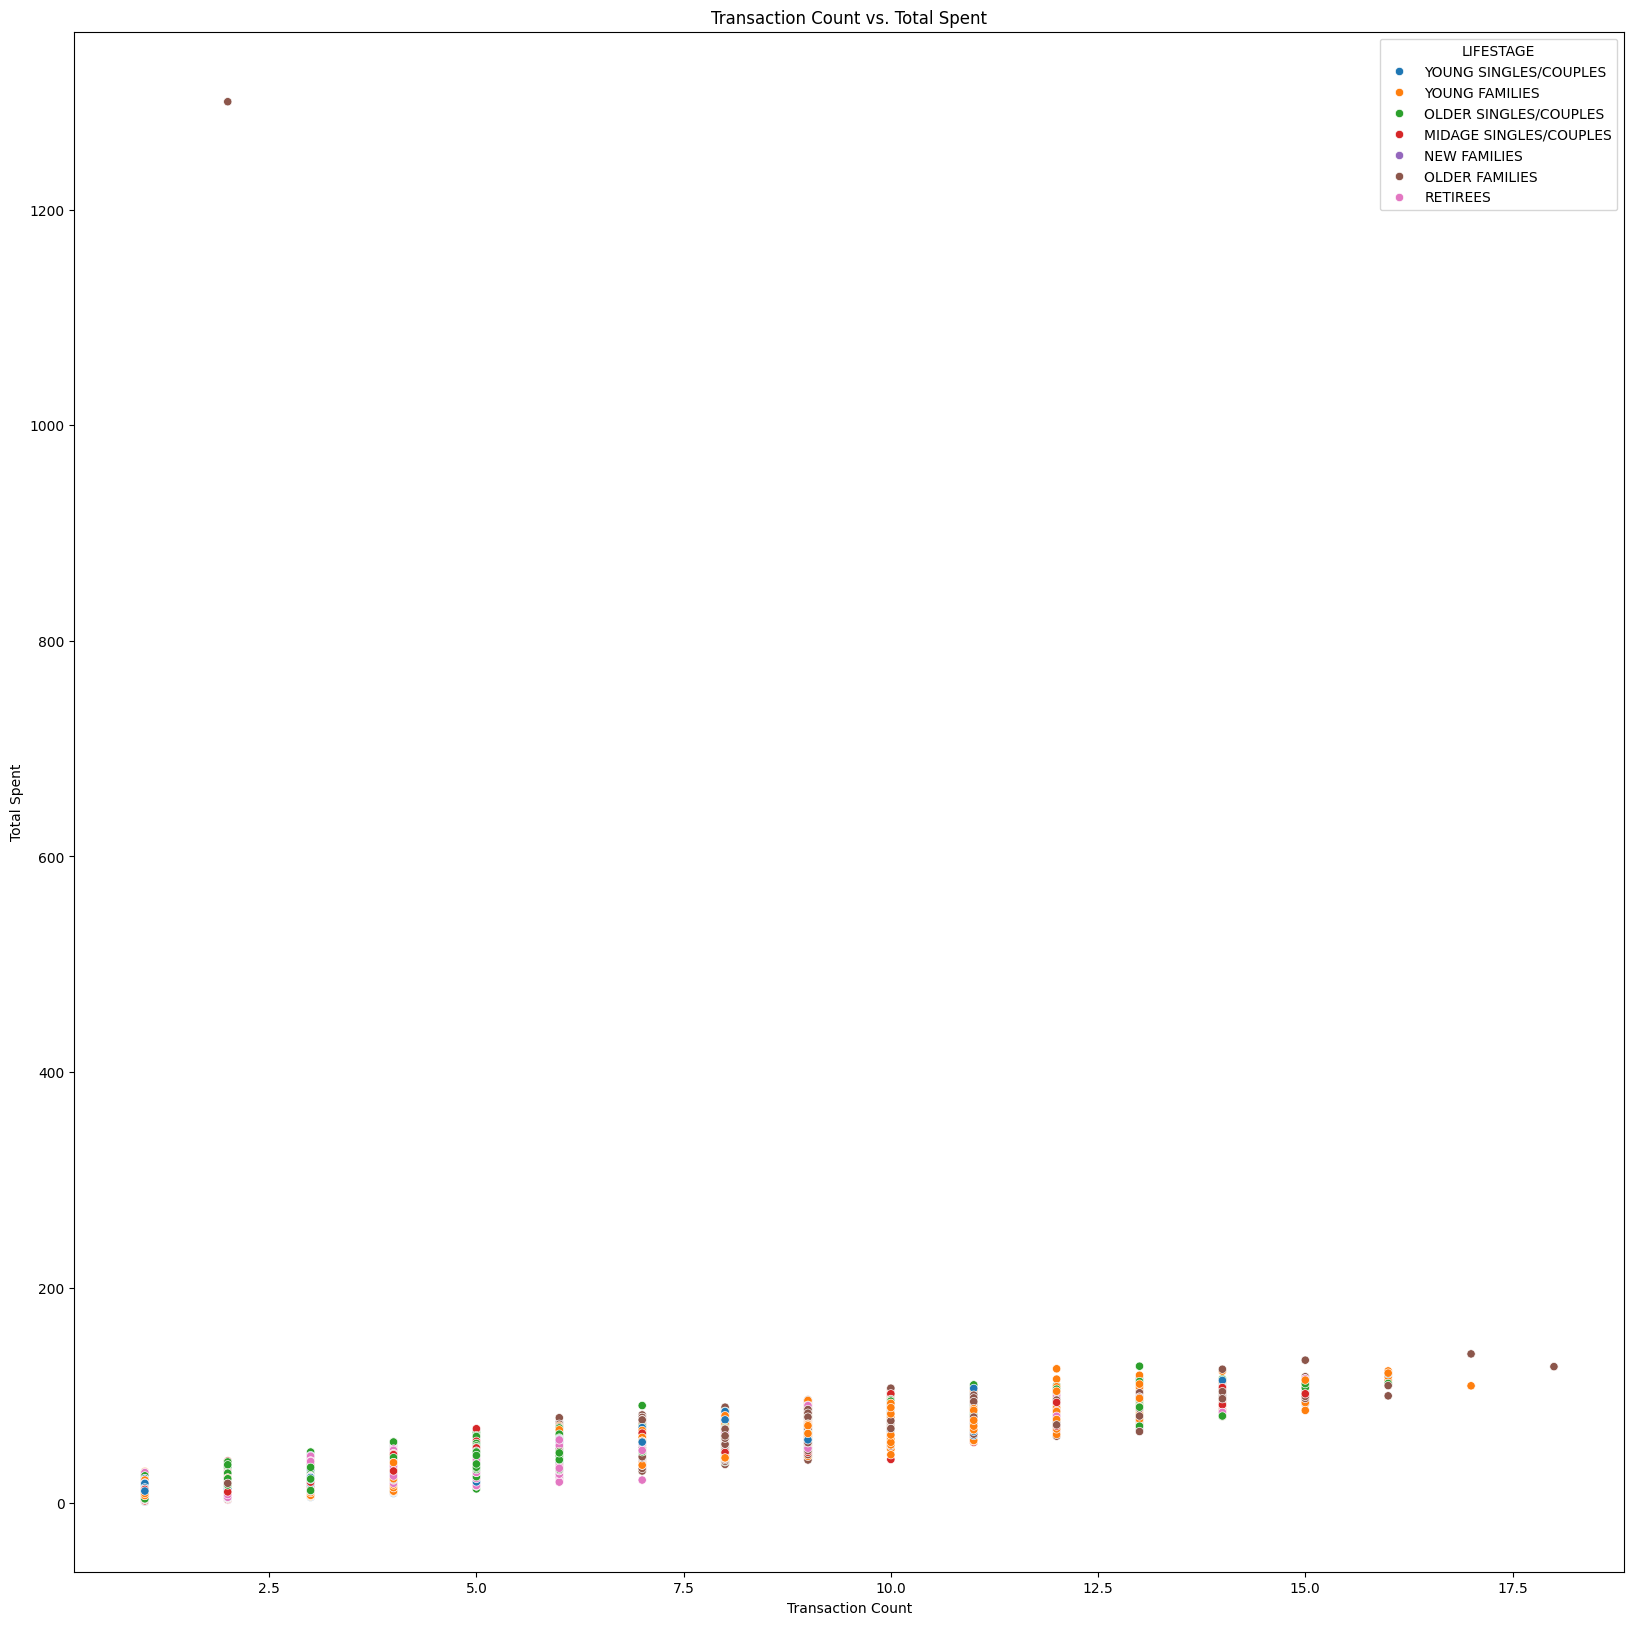

In [52]:
plt.figure(figsize=(20, 20))
sns.scatterplot(x=customer_sales['transaction_count'], y=customer_sales['total_spent'], hue=customer_sales['LIFESTAGE'])
plt.title('Transaction Count vs. Total Spent')
plt.xlabel('Transaction Count')
plt.ylabel('Total Spent')
plt.show()